In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## TODO: Replace with the path to your dataset
PATH_TO_DATASET = 'complaints.csv' 
############################################################

df = pd.read_csv(PATH_TO_DATASET)
df.head()

/Users/justina-irene/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-01-31,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,I purchased and financed my home through wells...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,OR,97048.0,Servicemember,Consent provided,Web,2023-01-31,Closed with monetary relief,Yes,NaN,6510170
1,2023-04-10,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,AMERICAN EXPRESS COMPANY,IN,46815.0,NaN,NaN,Web,2023-04-10,Closed with non-monetary relief,Yes,NaN,6819440
2,2023-04-09,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,Experian Information Solutions Inc.,CA,95210.0,NaN,NaN,Web,2023-04-09,In progress,Yes,NaN,6812250
3,2023-04-08,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,Experian Information Solutions Inc.,AZ,85381.0,NaN,NaN,Web,2023-04-08,In progress,Yes,NaN,6811608
4,2022-03-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,DISCOVER BANK,DE,19703.0,NaN,NaN,Referral,2022-03-11,Closed with monetary relief,Yes,NaN,5318105


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df=df.fillna('')
df['combined_text'] = df['Product'] + ' ' + df['Sub-product'] + ' ' + df['Issue'] + ' ' + df['Sub-issue'] + ' ' + df['Consumer complaint narrative'] + ' ' + df['Company public response'] + ' ' + df['Company'] + ' ' + df['Company response to consumer']


vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df['combined_text'])

# Calculate cosine similarity
similarities = cosine_similarity(vectors)

# Identify duplicate rows
duplicates = []
for i in range(similarities.shape[0]):
    for j in range(i+1, similarities.shape[0]):
        if similarities[i,j] > 0.9:   # Define a threshold for similarity
            duplicates.append((i,j))

# Remove duplicate rows
df.drop(index=[dup[1] for dup in duplicates], inplace=True)

# Re


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538637 entries, 0 to 3538636
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 486.

In [3]:
print(df.isnull().sum())

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        702791
Consumer complaint narrative    2263056
Company public response         1958926
Company                               0
State                             41191
ZIP code                          41719
Tags                            3150564
Consumer consent provided?       878871
Submitted via                         0
Date sent to company                  0
Company response to consumer          4
Timely response?                      0
Consumer disputed?              2770261
Complaint ID                          0
dtype: int64


<AxesSubplot:>

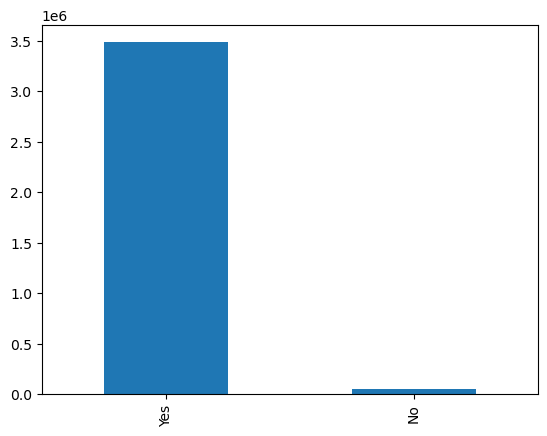

In [4]:
df['Timely response?'].value_counts().plot(kind='bar')

<AxesSubplot:>

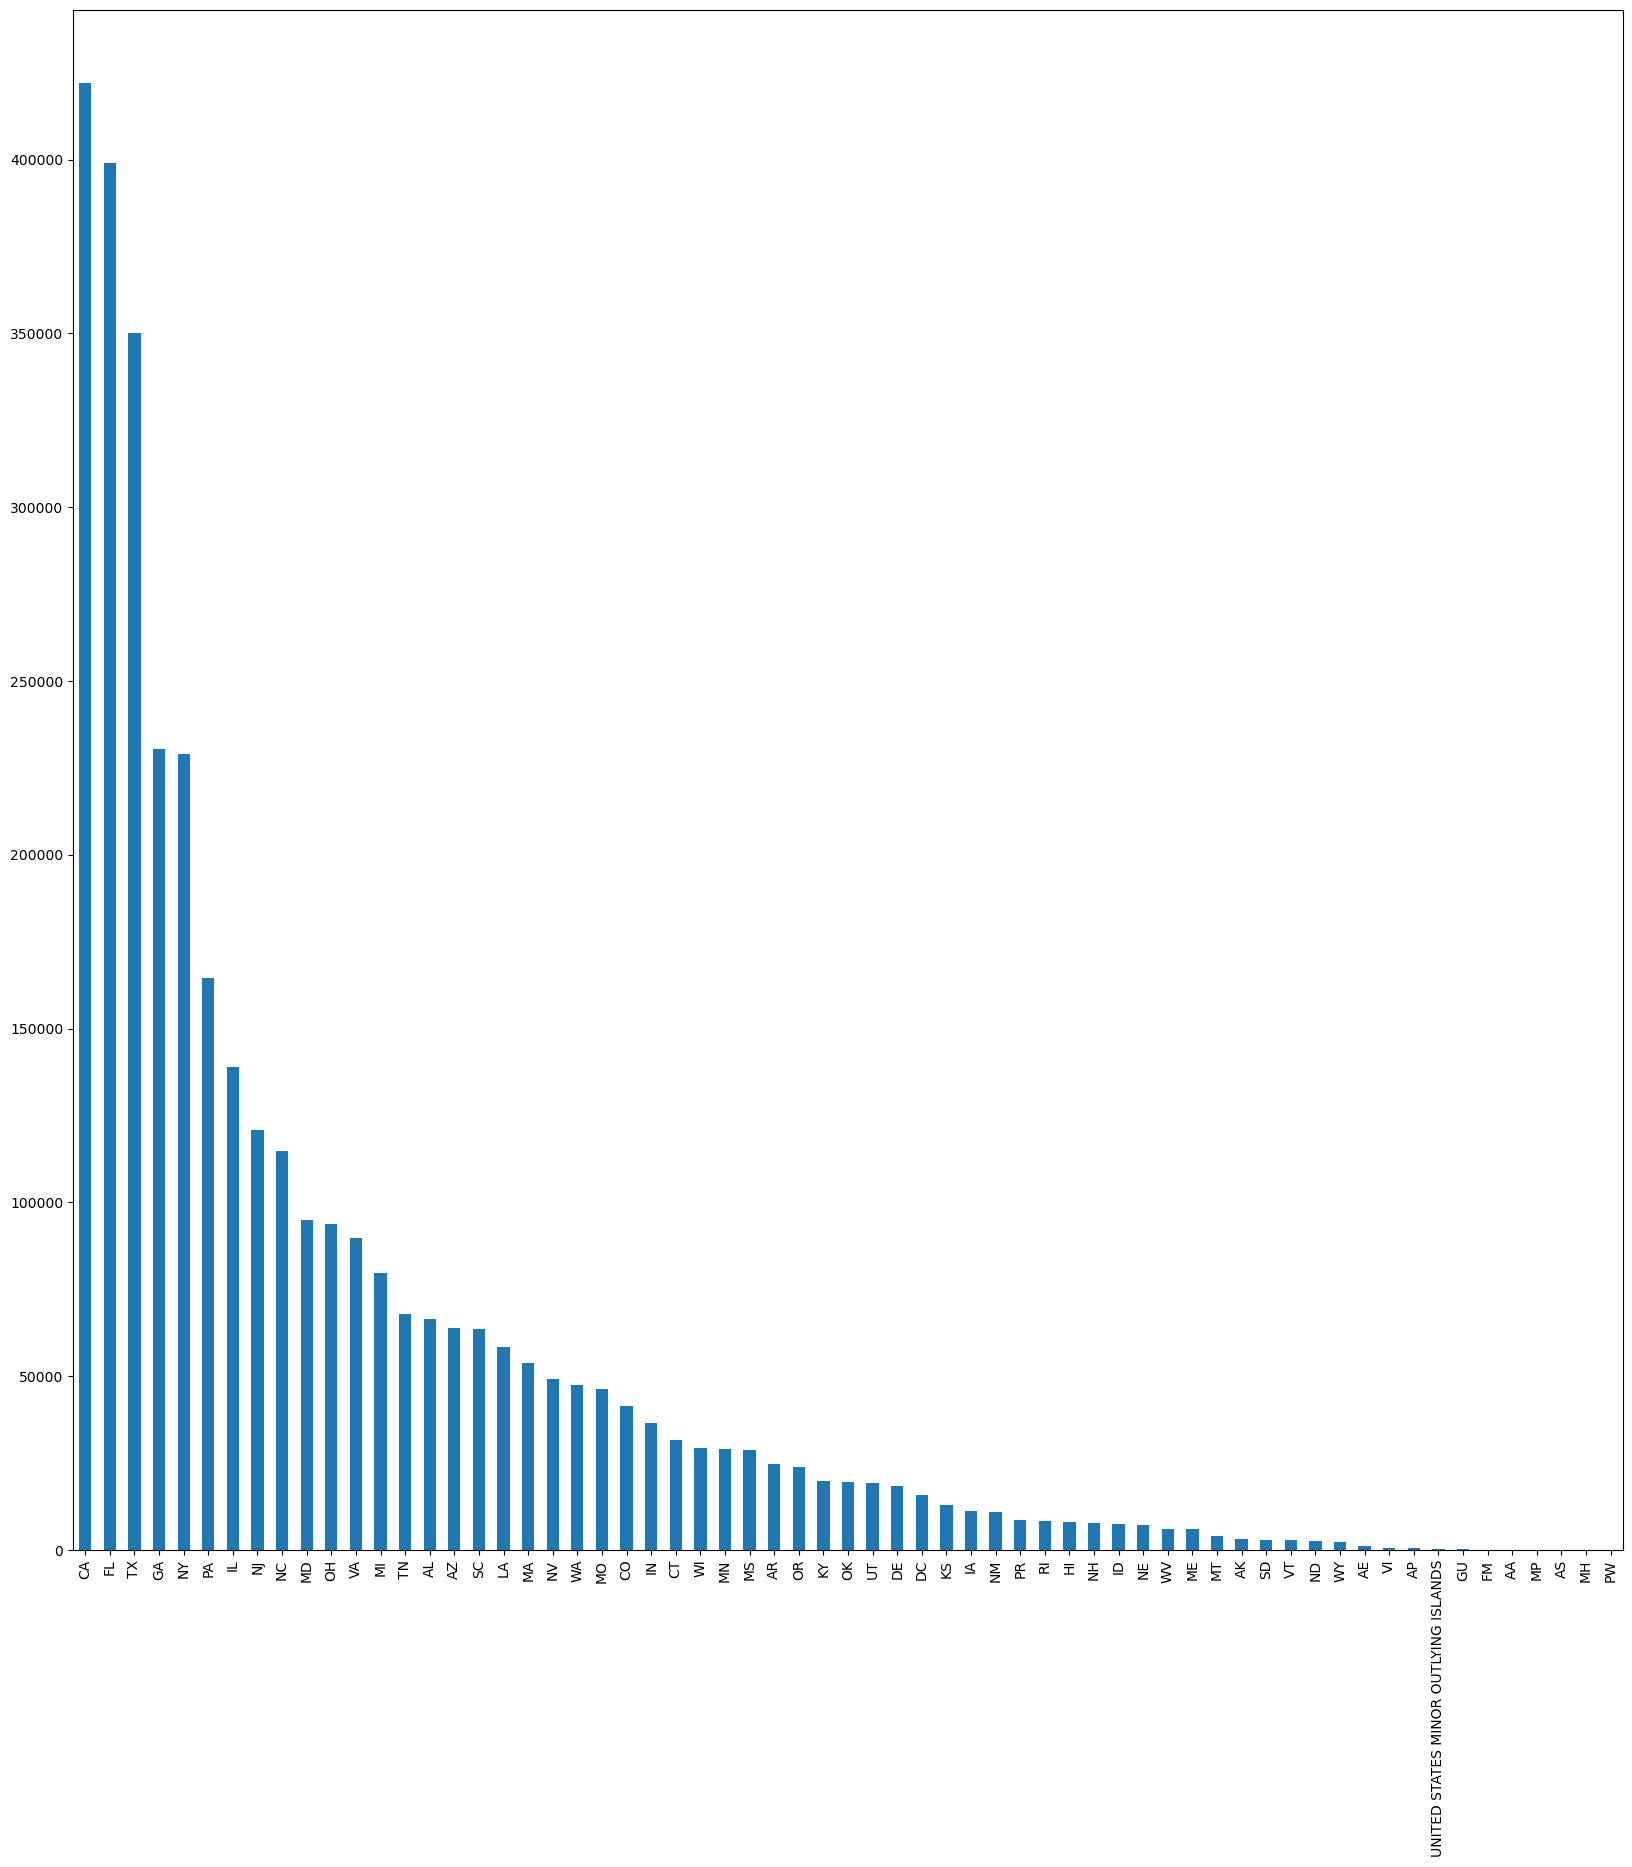

In [5]:
plt.figure(figsize=(20, 20))
df['State'].value_counts().plot(kind='bar')

<AxesSubplot:>

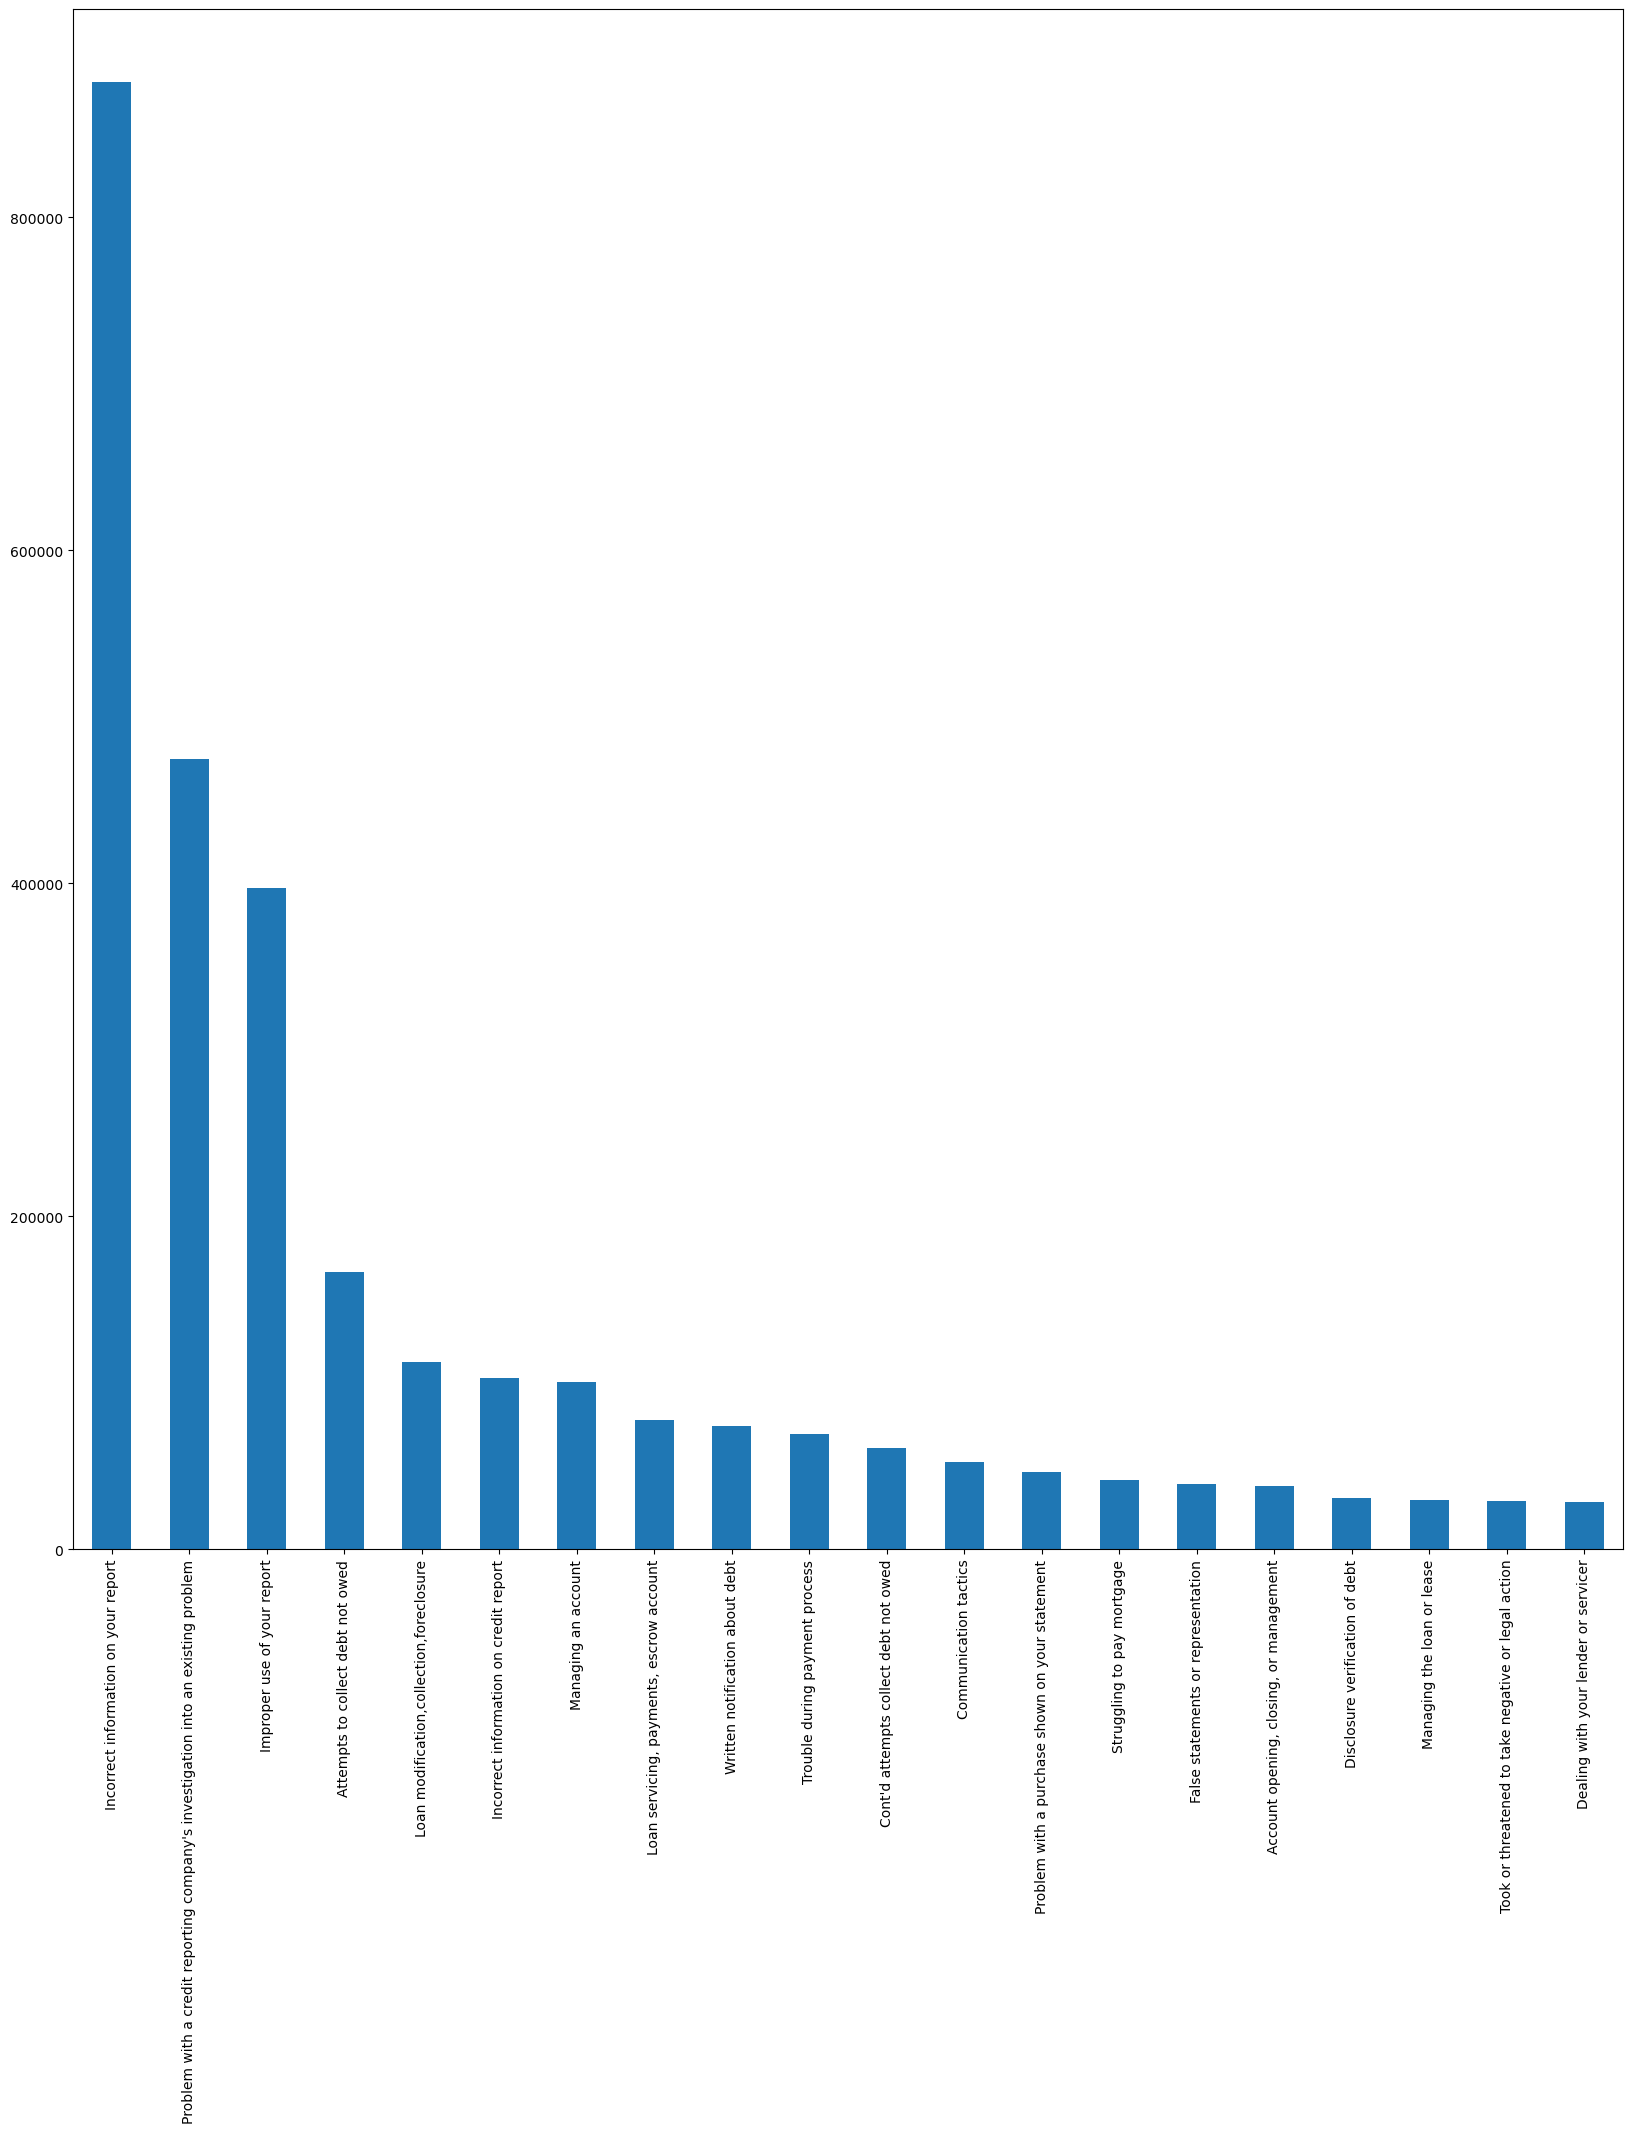

In [6]:
plt.figure(figsize=(20, 20))
df['Issue'].value_counts()[:20].plot(kind='bar')

<AxesSubplot:>

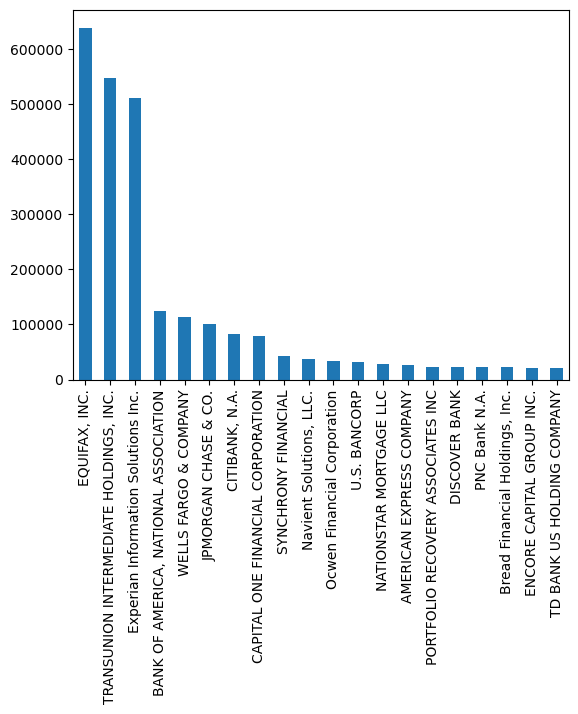

In [7]:
df['Company'].value_counts()[:20].plot(kind='bar')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538637 entries, 0 to 3538636
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 486.

In [9]:
print(df.isnull().sum())

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        702791
Consumer complaint narrative    2263056
Company public response         1958926
Company                               0
State                             41191
ZIP code                          41719
Tags                            3150564
Consumer consent provided?       878871
Submitted via                         0
Date sent to company                  0
Company response to consumer          4
Timely response?                      0
Consumer disputed?              2770261
Complaint ID                          0
dtype: int64


235163/2573063 = 9.1%
653711/2573063 =64%
sub-issue, Consumer complaint narrative，Company public response, Tags, Consumer disputed? need to drop
Sub-product, State，ZIP code missing value can be replaced by mode

In [10]:
df = df.drop(['Sub-product', 'Consumer complaint narrative','Company public response','Tags','Consumer disputed?','Consumer consent provided?'], axis=1)


In [11]:

df['State'].fillna(df['State'].mode()[0])
df['ZIP code'].fillna(df['ZIP code'].mode()[0])

0          97048.0
1          46815.0
2          95210.0
3          85381.0
4          19703.0
            ...   
3538632    11211.0
3538633    30047.0
3538634    27379.0
3538635    44820.0
3538636    10462.0
Name: ZIP code, Length: 3538637, dtype: object

In [12]:
counts2 = df['State'].value_counts().to_dict()
print(counts2)

{'CA': 421953, 'FL': 398868, 'TX': 350169, 'GA': 230488, 'NY': 228940, 'PA': 164521, 'IL': 138802, 'NJ': 120834, 'NC': 114686, 'MD': 95014, 'OH': 93619, 'VA': 89814, 'MI': 79768, 'TN': 67756, 'AL': 66289, 'AZ': 63903, 'SC': 63410, 'LA': 58485, 'MA': 53663, 'NV': 49173, 'WA': 47441, 'MO': 46344, 'CO': 41307, 'IN': 36632, 'CT': 31732, 'WI': 29453, 'MN': 29093, 'MS': 28624, 'AR': 24665, 'OR': 23765, 'KY': 19780, 'OK': 19439, 'UT': 19182, 'DE': 18397, 'DC': 15928, 'KS': 13012, 'IA': 11073, 'NM': 10858, 'PR': 8734, 'RI': 8202, 'HI': 8132, 'NH': 7883, 'ID': 7316, 'NE': 7271, 'WV': 6147, 'ME': 6122, 'MT': 4038, 'AK': 3103, 'SD': 2825, 'VT': 2819, 'ND': 2501, 'WY': 2302, 'AE': 1031, 'VI': 630, 'AP': 617, 'UNITED STATES MINOR OUTLYING ISLANDS': 313, 'GU': 276, 'FM': 115, 'AA': 54, 'MP': 51, 'AS': 38, 'MH': 33, 'PW': 13}


In [13]:
df['State']= df['State'].fillna('CA')

In [15]:
counts3 = df['ZIP code'].value_counts().to_dict()
print(counts3)

{30349.0: 3379, 35405.0: 2812, '30349': 2796, 19143.0: 2639, 33025.0: 2480, 33311.0: 2361, 19120.0: 2282, 77449.0: 2238, '35405': 2207, 30331.0: 2177, '33025': 2155, 28269.0: 2081, '19143': 1985, '77449': 1981, 2301.0: 1889, 30281.0: 1844, 33023.0: 1839, '33311': 1775, 19124.0: 1771, 33169.0: 1767, 30058.0: 1765, '28269': 1751, '30331': 1742, 30318.0: 1733, '19120': 1733, 77084.0: 1637, 19144.0: 1619, 30038.0: 1616, 11236.0: 1609, 30016.0: 1603, 19140.0: 1600, 33313.0: 1599, '33023': 1580, 30253.0: 1575, 60620.0: 1573, '30058': 1568, '02301': 1543, 19138.0: 1542, 33068.0: 1529, '30281': 1519, 19139.0: 1518, '33169': 1475, 33056.0: 1453, 60619.0: 1451, '30318': 1416, 77494.0: 1413, 30213.0: 1411, 28216.0: 1409, 11434.0: 1391, 77407.0: 1383, 19131.0: 1365, 19141.0: 1361, 30228.0: 1361, 30135.0: 1361, 33161.0: 1356, 19111.0: 1350, '30253': 1346, '60620': 1339, 30052.0: 1332, '77084': 1328, '19144': 1328, 30039.0: 1323, 60628.0: 1320, 19121.0: 1318, 30044.0: 1316, '33068': 1316, '30038': 1

In [16]:
df['ZIP code']= df['ZIP code'].fillna('30349.0')

In [17]:
df.head()

,Date received,Product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2023-01-31,Mortgage,Trouble during payment process,NaN,WELLS FARGO & COMPANY,OR,97048.0,Web,2023-01-31,Closed with monetary relief,Yes,6510170
1,2023-04-10,"Credit reporting, credit repair services, or o...",Improper use of your report,Credit inquiries on your report that you don't...,AMERICAN EXPRESS COMPANY,IN,46815.0,Web,2023-04-10,Closed with non-monetary relief,Yes,6819440
2,2023-04-09,"Credit reporting, credit repair services, or o...",Problem with a credit reporting company's inve...,Investigation took more than 30 days,Experian Information Solutions Inc.,CA,95210.0,Web,2023-04-09,In progress,Yes,6812250
3,2023-04-08,"Credit reporting, credit repair services, or o...",Problem with a credit reporting company's inve...,Investigation took more than 30 days,Experian Information Solutions Inc.,AZ,85381.0,Web,2023-04-08,In progress,Yes,6811608
4,2022-03-10,"Credit reporting, credit repair services, or o...",Incorrect information on your report,Account status incorrect,DISCOVER BANK,DE,19703.0,Referral,2022-03-11,Closed with monetary relief,Yes,5318105


In [18]:
df.tail()

,Date received,Product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
3538632,2016-07-12,Bank account or service,"Account opening, closing, or management",NaN,"CITIBANK, N.A.",NY,11211.0,Web,2016-07-12,Closed with monetary relief,Yes,2009169
3538633,2017-02-19,Credit reporting,Unable to get credit report/credit score,Problem getting report or credit score,Experian Information Solutions Inc.,GA,30047.0,Web,2017-02-19,Closed with explanation,Yes,2351504
3538634,2017-04-26,Mortgage,Trouble during payment process,NaN,Selene Finance LP,NC,27379.0,Web,2017-04-26,Closed with explanation,Yes,2467475
3538635,2017-02-07,Mortgage,"Application, originator, mortgage broker",NaN,JPMORGAN CHASE & CO.,OH,44820.0,Web,2017-02-07,Closed with explanation,Yes,2333389
3538636,2018-03-19,"Credit reporting, credit repair services, or o...",Incorrect information on your report,Information belongs to someone else,"EQUIFAX, INC.",NY,10462.0,Fax,2018-03-19,Closed with explanation,Yes,2846995
